# Stability Analysis in Control Systems

We continue our journey into the world of control systems by delving deeper into stability analysis. Let's build upon the conclusions we arrived at last time.

Consider a closed-loop system characterized by its transfer function. For simplicity, we assume a unity-feedback system where $ G(s) $ is the open-loop transfer function, $ R $ is the input, and $ Y $ is the output. 

<table> 
<tr>
    <img src="./pics/17_Stability_and_Routh_Criterion_system.png?1" alt="17_Stability_and_Routh_Criterion_system" style="width:450px;"/>
</tr></table>


The closed-loop transfer function is given by:

$$
\frac{Y(s)}{R(s)} = \frac{G(s)}{1 + G(s)}
$$


The characteristic equation of our system is $ 1 + G(s) = 0 $. The roots of this equation, also known as the closed-loop poles, dictate the system's stability. 


#### Stability Criteria (**Recall from last lecture**)

Stability is determined by the position of these roots in the complex plane.

1. **Stable System:** A system is stable if *all* roots of the characteristic equation lie strictly in the left-half plane (LHP). 
 - Remember the comments we did no asymptotic stability and BIBO stability.

2. **Unstable System:** A system is unstable if at least one root is in the right-half plane (RHP) or at least one pair of roots lies on the imaginary axis ($j\omega$ axis).

3. **Marginally Stable System:** This is a special case where all characteristic roots are in the LHP, except for some simple roots on the imaginary axis. These are distinct, non-repeating roots.



**🤔 Pop-up Question:** Why is it crucial for roots on the $j\omega$ axis to be simple for marginal stability?

**Answer:** Simple roots on the $j\omega$ axis result in bounded outputs for certain input classes, making the system marginally stable under specific conditions.


## Determining Stability

Let's now progress to determine stability. The characteristic equation can generally be represented as an nth-order polynomial:

$$
\Delta(s) = a_0 s^n + a_1 s^{n-1} + \dots + a_{n-1} s + a_n = 0
$$

- This equation is derived from $ 1 + G(s) = 0 $ and represents the poles of our closed-loop system.

- We would like to know if the zeros of this characeterist equations are stable or not.

**Note:** The zeros of the closed-loop system are not considered in stability analysis, as they affect only the magnitude, not the mode, of the response.


#### Controllability, Observability, and Zeros

A crucial assumption in our analysis is that zeros do not cancel poles, a condition typically met in controllable and observable systems. If a zero cancels an unstable pole, it can lead to incorrect stability assessments. 

This is the point of convergence for both asymptotic stability and Bounded Input Bounded Output (BIBO) stability. In scenarios where these conditions aren't met, the two types of stability diverge in their interpretations. Specifically, in BIBO stability, the cancellation of a pole by a zero does not manifest in the system's behavior. However, when considering internal stability, which is analyzed using a state variable model, the impact of such a cancelled pole becomes evident in the overall stability of the system.

The presumption that a system is both controllable and observable generally holds true for the majority of real-world systems.

## Routh Stability Criterion

We now turn our attention to the Routh stability criterion, an invaluable method in the realm of stability analysis. While modern numerical tools can effortlessly compute the roots of an equation, the Routh criterion helps beyond these numerical methods, especially in design-oriented contexts. It enables us to both assess stability and identify design parameters that ensure a stable system configuration.

Consider our characteristic equation: $a_0 s^n + a_1 s^{n-1} + \dots + a_{n-1} s + a_n = 0$. The coefficients of this equation are intrinsically linked to the physical attributes of the system. A common inquiry might involve determining the permissible ranges for these coefficients that guarantee system stability. In such instances, relying solely on numerical tools may prove inadequate, as they typically require predefined numerical values for the coefficients, which isn't always feasible in design scenarios. The Routh stability criterion addresses this gap, providing insights into the stability implications of varying system parameters.


#### Constructing the Routh Array

We start with our characteristic equation:

$$
a_0 s^n + a_1 s^{n-1} + \dots + a_{n-1} s + a_n = 0
$$

- Ensure $ a_n \neq 0 $ to avoid trivial roots at $ s = 0 $.
- $ a_0 > 0 $. If $ a_0 $ is not positive we can simply multiply by $-1$ and this does not change the analysis.


**🤔 Pop-up Question:** Why is it important for the leading coefficient $ a_0 $ to be positive in the Routh stability analysis?

**Answer:** A positive $ a_0 $ ensures that the Routh array starts with a positive value, which is crucial for correctly determining the number of sign changes and, consequently, the system's stability.


### Necessary conditions

- **All Coefficients Must Be Positive:** For a system to be stable, every coefficient in the characteristic polynomial must be positive and non-zero. A zero or negative coefficient is a red flag, indicating potential instability. 

Note that if we did not have $ a_0 > 0 $ then this condition becomes: **all coefficients must be of the same sign**.


### Sufficient conditions: Constructing the Routh Array

Given the characteristic equation:

$$
a_0 s^n + a_1 s^{n-1} + \dots + a_{n-1} s + a_n = 0
$$

Now, let's construct the Routh array, a structured method to analyze the stability of a polynomial equation. The Routh array is built row by row, using the coefficients of the characteristic polynomial.

1. **First Two Rows:** The first two rows are directly derived from the polynomial. For a polynomial of degree $ n $, the first row contains coefficients of even powers of $ s $ (e.g., $ a_0, a_2, a_4, \ldots $), while the second row contains coefficients of odd powers of $ s $ (e.g., $ a_1, a_3, a_5, \ldots $).

2. **Subsequent Rows:** Each element of the subsequent rows is calculated using a specific formula. For the third row (corresponding to $ s^{n-2} $), each element is calculated as follows:

   - The first element of the third row is given by $ \frac{a_1 \times a_2 - a_0 \times a_3}{a_1} $.
   - The second element is $ \frac{a_1 \times a_4 - a_0 \times a_5}{a_1} $, and so on.

   **Note:** If any coefficient is missing (i.e., the power of $ s $ does not appear in the polynomial), treat it as zero in these calculations.

3. **Indexing Rows:** The indexing of rows (e.g., $ s^{n-1}, s^{n-2}, \ldots $) serves as a guide but does not correspond to the powers of $ s $ in the original polynomial after the first two rows.


Here’s an example of what the Routh table structure would look like for a generic $ n $-th order polynomial:

| Order of $s$ | Column 1 | Column 2 | Column 3 | ... | Column $\frac{n}{2}+1$ |
|--------------|----------|----------|----------|-----|------------------------|
| $s^n$        | $a_0$    | $a_2$    | $a_4$    | ... | $a_{2k}$ or 0          |
| $s^{n-1}$    | $a_1$    | $a_3$    | $a_5$    | ... | $a_{2k+1}$ or 0        |
| $s^{n-2}$    | $b_1 = \frac{a_1 a_2 - a_0 a_3}{a_1}$ | $b_2 = \frac{a_1 a_4 - a_0 a_5}{a_1}$ |  | ... |                        |
| $s^{n-3}$    |          |          |          | ... |                        |
| ...          |          |          |          | ... |                        |
| $s^1$        |          |          |          | ... |                        |
| $s^0$        |          |          |          | ... |                        |


- **$ k $** is the integer part of $ \frac{n}{2} $.
- A missing cofficient is 0.


### Illustrative Example

Let's illustrate this with a specific 4th order polynomial:

$$ 
s^4 + 8 s^3 + 18 s^2 + 16 s + 5 = 0 
$$

1. **First Two Rows:**
   - Row for $ s^4 $: $ 1 $ (coefficient of $ s^4 $), $ 18 $ (coefficient of $ s^2 $), $ 5 $ (constant term).
   - Row for $ s^3 $: $ 8 $ (coefficient of $ s^3 $), $ 16 $ (coefficient of $ s^1 $), $ 0 $ (since there is no $ s^{-1} $ term).

2. **Row for $ s^2 $:**
   - First element: $ \frac{(8 \times 18 - 1 \times 16)}{8} = \frac{128}{8} = 16 $.
   - Second element: $ \frac{(8 \times 5 - 1 \times 0)}{8} = \frac{40}{8} = 5 $.
   - Third element is zero (as there are no more elements to use in the calculation).

3. **Row for $ s^1 $:**
   - First element: $ \frac{(16 \times 16 - 8 \times 5)}{16} = \frac{27}{2} = 13.5 $.
   - Second element is zero (as the corresponding elements above are zero or do not exist).

4. **Row for $ s^0 $:**
   - Only the first element is needed, which is the same as the second element of the previous row: $ 5 $.

Here is the Routh array:

| Order of $ s $ | Column 1 | Column 2 | Column 3 |
|------------------|----------|----------|----------|
| $ s^4 $        | 1        | 18       | 5        |
| $ s^3 $        | 8        | 16       | 0        |
| $ s^2 $        | 16       | 5        | 0        |
| $ s^1 $        | 13.5     | 0        |          |
| $ s^0 $        | 5        |          |          |

Since there are no sign changes in the first column of the Routh array, this system is stable. The Routh stability criterion tells us that all roots of the characteristic equation are in the left half of the complex plane, indicating stability.

### Analyzing Stability with the Routh Array

After constructing the Routh array, we examine the first column's signs to draw conclusions about the system's stability.

- If there are no sign changes in the first colum of the Routh array, then the system is stable.
- If there are sign changes, the system is not stable and the number of roots in the RHP is equal to the number of sign changes. The criteria hence provides information on the number of unstable roots, but does not give you the location of the roots.


In [ ]:
import numpy as np

def routh_array(coefficients):
    n = len(coefficients)
    routh = []

    # First two rows
    r1 = [coefficients[i] for i in range(0, n, 2)]
    r2 = [coefficients[i] for i in range(1, n, 2)]
    
    routh.append(r1)
    routh.append(r2 + [0] * (len(r1) - len(r2)))  # Padding zeros

    # Other rows
    for i in range(2, n):
        row = []
        for j in range(len(r1) - 1):
            # Calculate element
            first = routh[i-1][0]
            upper = routh[i-2][j+1]
            left = routh[i-1][j+1] if j+1 < len(routh[i-1]) else 0
            element = ((upper * first) - left * routh[i-2][0]) / first
            row.append(element)
        routh.append(row + [0] * (len(r1) - len(row)))  # Padding zeros

        # Check for row of zeros
        if all(r == 0 for r in row):
            print("Row of zeros detected. Special procedure needed.")
            return routh

    return routh

# Example usage
coeffs = [1, 8, 18, 16, 5]
routh = routh_array(coeffs)

# Printing the Routh array
for row in routh:
    print(row)


[1, 18, 5]
[8, 16, 0]
[16.0, 5.0, 0]
[13.5, 0.0, 0]
[5.0, 0.0, 0]


### Illustrative example 2

To calculate the Routh array for the polynomial $ 3s^4 + 10s^3 + 5s^2 + 5s + 2 = 0 $, we can use the same method as before. 

Let's perform the calculations step by step:

1. **First Two Rows:**
   - Row for $ s^4 $: $ 3 $ (coefficient of $ s^4 $), $ 5 $ (coefficient of $ s^2 $), $ 2 $ (constant term).
   - Row for $ s^3 $: $ 10 $ (coefficient of $ s^3 $), $ 5 $ (coefficient of $ s^1 $), $ 0 $ (since there is no $ s^{-1} $ term).

2. **Row for $ s^2 $:**
   - First element: $ \frac{(10 \times 5 - 3 \times 5)}{10} = \frac{35}{10} = 3.5 $.
   - Second element: $ \frac{(10 \times 2 - 3 \times 0)}{10} = \frac{20}{10} = 2 $.
   - Third element is zero (as there are no more elements to use in the calculation).

3. **Row for $ s^1 $:**
   - First element: $ \frac{(3.5 \times 5 - 10 \times 2)}{3.5} = \frac{-2.5}{3.5} = -0.71 $.
   - Second element is zero (as the corresponding elements above are zero or do not exist).

4. **Row for $ s^0 $:**
   - Only the first element is needed, which is the same as the first element of the previous row: $ 2 $.

Here is the completed Routh array:

| Order of $ s $ | Column 1 | Column 2 | Column 3 |
|------------------|----------|----------|----------|
| $ s^4 $        | 3        | 5        | 2        |
| $ s^3 $        | 10       | 5        | 0        |
| $ s^2 $        | 3.5      | 2        | 0        |
| $ s^1 $        | -0.71    | 0        |          |
| $ s^0 $        | 2        |          |          |

Since there are two sign changes in the first column of the Routh array (from positive to negative between $ s^2 $ and $ s^1 $ and one from negative to positive between $ s^1 $ and $ s^0 $ ), this system is unstable. 

The Routh stability criterion indicates that there are two roots of the characteristic equation is in the right half of the complex plane, leading to the conclusion of instability.

**Note that in this case, given that the second row is divisible by 5, we could also have written the following table:**

| Order of $ s $ | Column 1 | Column 2 | Column 3 |
|------------------|----------|----------|----------|
| $ s^4 $        | 3        | 5        | 2        |
| $ s^3 $        | 2        | 1        | 0        |
| $ s^2 $        | 3.5      | 2        | 0        |
| $ s^1 $        | $-\frac{1}{7}$      | 0        |          |
| $ s^0 $        | 2        |          |          |


And finally we can try out our `routh_array` function:

In [ ]:
routh_array([3, 10, 5, 5, 2])

[[3, 5, 2],
 [10, 5, 0],
 [3.5, 2.0, 0],
 [-0.7142857142857143, 0.0, 0],
 [2.0, 0.0, 0]]

## Routh Stability Criterion: Handling Roots on the Imaginary Axis

We delve into more intricate scenarios where the roots of the characteristic equation may lie on the imaginary axis (jω axis). This discussion will lead us through the process of dealing with such special cases.

### Illustrative example 3

Consider a system represented by the characteristic equation 

$$
\Delta(s) = s^5 + s^4 + 4s^3 + 24s^2 + 3s + 63 = 0 
$$

When applying the Routh stability criterion to this system, we encounter a specific situation. In this case, a complete row in the Routh array may turn out to be all zeros, indicating the possibility of roots on the jω axis. This is a significant indicator, as it implies that the system might exhibit marginal stability or instability.


| Order of $ s $ | Column 1 | Column 2 | Column 3 |
|----------------|----------|----------|----------|
| $ s^5 $        | 1        | 4        | 3        |
| $ s^4 $        | 1        | 24       | 63        |
| $ s^3 $        | $\cancel{-20} \rightarrow -1$      | $\cancel{-60} \rightarrow -3$       |       |
| $ s^2 $        | $\cancel{21} \rightarrow  1$     | $\cancel{63}\rightarrow 3 $         | 0        |
| $ s^1 $        | $0$      | 0        |          |
| $ s^0 $        |        |          |          |


### Understanding the All-Zero Row

   - If we encounter an all-zero row at any step, the coefficient of the subsequent row is undefined and **we need to construct an auxiliary polynomial** from the row immediately above the all-zero row and use its derivative to continue the Routh array construction.
   - This indicates the potential presence of roots on the jω axis.

- **All-Zero Row Implication:** When an all-zero row is encountered in the Routh array, it suggests that the characteristic equation may have symmetrical roots about the imaginary axis. This could mean a pair of roots lying exactly on the jω axis or complex conjugate pairs symmetrical across this axis.

- **Stability Uncertainty:** The presence of an all-zero row does not immediately classify the system as stable or unstable. Instead, it indicates that further analysis is needed to determine the system's stability.


<table> 
<tr>
    <img src="./pics/17_Stability_and_Routh_Criterion_system_1.png?1" alt="17_Stability_and_Routh_Criterion_system_1" style="width:750px;"/>
</tr></table>

- When a row is all zeros, we cannot conclude on the stability of the system, and further investigation is needed.

- Note that the system cannot be stable.

- Due to symmetry, an all zero row will always be associated with and odd power of s.


#### Constructing the Auxiliary Polynomial

- To address the all-zero row, we construct an auxiliary polynomial from the coefficients of the row just above the all-zero row. For instance, if the all-zero row is at $ s^2 $, we look at the $ s^3 $ row for these coefficients, if the all-zero row is at $ s^1 $ (as in our previous case), we look at the $ s^2 $.

With reference to our example above, the auxiliary polynomial is:

$$ A(s) = s^2 + 3 $$

- Note that the $s^2$ comes from the order of row just above the all-zero row (in our case $s^2$).

- **The auxiliary polynomial is a factor of the original characteristic equation $\Delta(s)$.**

- Since in this case, the roots of the auxiliary polynomial are imaginary, we can conclude that the roots of the characteristic equation are also on the imaginary axis (and we are in the _middle_ case above), and the system is marginally stable or unstable in the case we have multiple imaginary poles. In fact to conclude about the stability we must also conclude about the remaining roots of the characteristic equation (those of the auxiliary polynomial are a subset).

#### Concluding about the stability

Once we have the auxiliary polynomial there are two ways to conclude about the stability:

1. We divide the total characteristic equation by the auxiliary polynomial, we obtain the remainder polynomial and we apply the Routh criterion to the remainder polynomial

2. We take the derivative of the auxiliary polynomial $\frac{dA}{ds}$ and replace the all-zero row with the coefficients of this derivative. This modification allows us to continue with the Routh array construction.

In our case:

$$\frac{dA}{ds} = 2s + 0$$

and we can finish the Routh array:

| Order of $ s $ | Column 1 | Column 2 | Column 3 |
|----------------|----------|----------|----------|
| $ s^5 $        | 1        | 4        | 3        |
| $ s^4 $        | 1        | 24       | 63        |
| $ s^3 $        | $\cancel{-20} \rightarrow -1$      | $\cancel{-60} \rightarrow -3$       |       |
| $ s^2 $        | $\cancel{21} \rightarrow  1$     | $\cancel{63}\rightarrow 3 $         | 0        |
| $ s^1 $        | 2      | 0        |          |
| $ s^0 $        | 3      |          |          |

- After replacing the all-zero row and completing the Routh array, we reassess the first column for sign changes. The number of sign changes now gives us information about the stability of the system, considering the roots on the imaginary axis.

- In our case there are two sign changes. We conclude that the original polynomial has: 
   - two roots in the RHP (from the Routh array)
   - two roots on the imaginary axis (from the auxiliary polynomial)
   - one root in the LHP (the remaining one)
   
The system is unstable.

#### Special Case of $s_0$ Row Being All Zeros?
- **Infeasibility of All-Zero $s_0$ Row:** An all-zero row at the $s_0$ level (the last row of the Routh array) is practically not feasible. If it were to occur, it would imply a single root at the origin, which contradicts the all-zero row situation since a single root does not create this scenario.

- **Symmetry Consideration:** The symmetry involved in the root distribution of the characteristic equation implies that an all-zero row will correspond to an even power of $s_0$. Thus, the roots associated with an all-zero row will always have some symmetry about the imaginary axis.

-------

The Routh stability criterion is a pivotal analytical tool used in control engineering to assess the stability of linear systems. Here's a summary of its key points that we have see so far:

1. **Purpose**: The Routh criterion is used to determine whether a system is stable, unstable, or marginally stable without explicitly calculating the roots of its characteristic equation.

2. **Characteristic Equation**: Stability is analyzed based on the characteristic equation of the system's transfer function, typically represented as a polynomial in $ s $ (the Laplace variable).

3. **Construction of Routh Array**: The criterion involves constructing a tabular array, known as the Routh array, using the coefficients of the characteristic equation. The array is formed row by row, with the first two rows filled with the coefficients of the polynomial, alternating between even and odd powers of $ s $.

4. **Stability Analysis**:
   - If all elements in the first column of the Routh array are positive, the system is stable (no poles in the right-half of the s-plane).
   - The presence of sign changes in the first column indicates instability. The number of sign changes corresponds to the number of poles in the right-half of the s-plane.
   - If a row is composed entirely of zeros, it indicates symmetrical roots about the imaginary axis and requires further analysis.

5. **Handling Special Cases**:
   - **All-Zero Row**: When a row in the Routh array is all zeros, it suggests symmetrical roots about the imaginary axis. An auxiliary polynomial is formed from the row above the all-zero row, and its derivative is used to continue the Routh array construction.
   - **Marginal Stability**: An all-zero row can indicate marginal stability, where roots lie on the imaginary axis. However, further investigation is needed to confirm this.

6. **Auxiliary Polynomial**: This polynomial is derived from the row above the all-zero row. The derivative of the auxiliary polynomial is used to replace the all-zero row and continue the Routh array construction.

8. **Limitations**: While the Routh criterion can indicate the number and location (left-half or right-half plane) of the roots, it does not provide the exact values of these roots.


### Illustrative Example 3

Consider the system characterized by the polynomial 

$$
s^6 + 2s^5 + 8s^4 + 12s^3 + 20s^2 + 16s + 16 = 0
$$

As we construct the Routh array, we encounter an all-zero row at $ s^3 $.


| Order of $ s $ | Column 1 | Column 2 | Column 3 | Column 4 |
|------------------|----------|----------|----------|----------|
| $ s^6 $        | 1        | 8        | 20       | 16       |
| $ s^5 $        | $\cancel{2} \rightarrow 1$        | $\cancel{12} \rightarrow 6$       | $\cancel{16} \rightarrow 8$       | 0        |
| $ s^4 $        | $\cancel{2} \rightarrow 1$       | $\cancel{12} \rightarrow 6$       | $\cancel{16} \rightarrow 8$       | 0        |
| $ s^3 $        | 0        | 0       |         |          |
| $ s^2 $        | ...      | ...      |          |          |
| $ s^1 $        | ...      |          |          |          |
| $ s^0 $        | ...      |          |          |          |




The Routh array needs to be completed with further calculations starting from the modified $ s^3 $ row. This process will provide the necessary information to assess the system's stability.

In this case, we form an auxiliary polynomial from the $ s^4 $ row, which turns out to be:

$$ A(s) = s^4 + 6s^2 + 8 $$

The next step involves taking the derivative of this auxiliary polynomial:

$$ \frac{dA}{ds} = 4s^3 + 12s + 0 $$

| Order of $ s $ | Column 1 | Column 2 | Column 3 | Column 4 |
|------------------|----------|----------|----------|----------|
| $ s^6 $        | 1        | 8        | 20       | 16       |
| $ s^5 $        | $\cancel{2} \rightarrow 1$        | $\cancel{12} \rightarrow 6$       | $\cancel{16} \rightarrow 8$       | 0        |
| $ s^4 $        | $\cancel{2} \rightarrow 1$       | $\cancel{12} \rightarrow 6$       | $\cancel{16} \rightarrow 8$       | 0        |
| $ s^3 $        | $\cancel{4} \rightarrow 1   $     | $\cancel{12} \rightarrow 3$       |         |          |
| $ s^2 $        | 3      | 8      |          |          |
| $ s^1 $        | $\frac{1}{3}$      |          |          |          |
| $ s^0 $        | 8      |          |          |          |



**Conclusions**

- The first column of the Routh array are all positive (no sign changes). This means that the polynomial $\frac{\Delta(s)}{A(s)}$ has no roots in the RHP.

- When we look at the auxiliary polynomial: $ A(s) = s^4 + 6s^2 + 8 $, we can solve for its roots:

   - set $s^2=z \Rightarrow A(s) = z^2 + 6z + 8 $ with roots: $s=\pm j\sqrt{2};\;\;\;s=\pm j2$
   - the auxiliary polynomial has imaginary only roots (middle case in the diagram we drew above)
  
- The system is hence **marginally stable**, oscillating at a frequency $\sqrt{2}\;\;rad/s$ and at $2\;\;rad/s$ (the output remains bounded). We will use this point during the design phase.

### Situation: Zero Pivot Element in a Row

A special situation arises when only the pivot element (the first element) of a row in the Routh array is zero, while at least one of the subsequent elements in the same row is non-zero. This scenario requires a distinct approach for continuation of the Routh array construction. Here are the details:

- The pivot element in a Routh array refers to the first element of any row. A zero pivot element with at least one non-zero element in the same row presents a unique case in the array formulation.

- A zero pivot element makes it impossible to use the standard Routh array formula for the subsequent row, as it involves division by the pivot element. 

- The presence of a zero pivot element does not immediately suggest symmetrical roots or roots on the imaginary axis, unlike an all-zero row. Instead, it represents a numerical condition resulting from the specific coefficients of the characteristic equation.


#### Handling the Zero Pivot Element
- **Approach**: To continue the Routh array construction, we typically replace the zero pivot element with a small positive number, denoted as $ \epsilon $. This substitution allows the calculation to proceed without the indeterminacy caused by division by zero.

- **Significance of $ \epsilon $**: The value of $ \epsilon $ is considered infinitesimally small, effectively tending towards zero. This substitution is a mathematical technique to overcome the computational hurdle and does not change the fundamental nature of the system being analyzed.

**🤔 Pop-up Question**: What does the substitution of $ \epsilon $ in place of a zero pivot element represent in the Routh array?

**Answer**: The substitution of $ \epsilon $ represents a method to circumvent the computational issue of dividing by zero. It allows for the continuation of the Routh array construction and aids in drawing conclusions about the system's stability.

Let's analyse this scenario through an example:

Consider the system characterized by the polynomial 

$$
s^5 + 3s^4 + 2s^3 + 6s^2 + 6s + 9 = 0
$$


| Order of $ s $ | Column 1 | Column 2 | Column 3 |
|------------------|----------|----------|----------|
| $ s^5 $        | 1        | 2        | 6        |
| $ s^4 $        | 3        | 6        | 9        |
| $ s^3 $        | 0        | 3        |          |
| $ s^2 $        |          |          |          |
| $ s^1 $        |          |          |          |
| $ s^0 $        |          |          |          |


We cannot make any stability assessment. The presence of a 0 as a pivot element represents a numerical condition resulting from the specific coefficients of the characteristic equation.

In this case, we replace the zero pivot in the row with $\epsilon$ and continue constructing the array.
This corresponds to perturbing the coefficients of the polynomial.


### Perturbation of the Characteristic Equation's Coefficients

1. **Stability of Roots**: The roots of a polynomial in the left or right half-plane are unlikely to 'jump' from one side of the complex plane to the other with a small perturbation in the coefficients. This stability of roots' locations in the complex plane forms the basis of this approach.

2. **Effect of Small Changes**: If the coefficients of the characteristic polynomial are slightly altered (say by 1% or less), the physical locations of the roots in the complex plane are expected to shift only slightly. This implies that roots originally in the left half-plane will likely remain there, and similarly for those in the right half-plane.

3. **Concern with Roots on the Imaginary Axis**: The risk in this perturbation method arises if the original characteristic equation has roots exactly on the imaginary axis (jω axis). A small change in coefficients might shift these roots into the right or left half-plane, altering the stability conclusion. If this was the case, you will not know if these imaginery roots have moved to the left or to the right.

4. **Assumption of No Roots on the Imaginary Axis**: If it is known beforehand that there are no roots on the imaginary axis, then perturbing the coefficients slightly should not significantly affect the conclusions about the system's overall stability.
    - Note that an all-zero row will indicate if there might be roots on the imaginary axis

5. **Handling a Zero Pivot in the Routh Array**: In practice, if a row in the Routh array has a zero pivot element, this problem can often be addressed by replacing the zero with a small positive number, $ \epsilon $. This approach is effectively equivalent to a minor perturbation of the characteristic equation's coefficients.

6. **Importance of All-Zero Row**: If there's an all-zero row in the Routh array, it usually indicates roots on the imaginary axis. Thus, in cases without an all-zero row, we can be more confident that perturbing the coefficients (as with the $ \epsilon $ substitution) won't lead to incorrect conclusions regarding stability.

7. **Practical Application**: This technique is particularly useful in automated calculations or algorithms where dealing with a zero pivot element is computationally problematic. By introducing $ \epsilon $, the Routh array can be completed, and stability can be assessed.

8. **Risk Assessment**: The key point here is the assessment of risk when applying this perturbation. If there is a chance of roots being on the imaginary axis, one needs to be cautious, as perturbation could lead to incorrect stability conclusions.


For now we will assume that there are no roots on the imaginary axis and we perturbe the coefficients of the polynomial. 

In this case, we replace the zero pivot in the row with $\epsilon$ and continue constructing the array.

After replacing the zero pivot with $\epsilon$, we reassess the first column for sign changes. The conclusions drawn from this modified Routh array help in assessing the stability of the system.


**Consideration of \( \epsilon \) in Limit Analysis**: It is important to note that the use of $ \epsilon $ in the context of a limiting process, where it tends towards zero, renders its sign (positive or negative) inconsequential. This is because, in cases where the system's characteristic equation does not have roots on the imaginary axis, the specific sign of the small perturbation introduced by $ \epsilon $ does not significantly impact the analysis of stability.


<table> 
<tr>
    <img src="./pics/17_Stability_and_Routh_Criterion_system_zero_pivot_11.png?1" alt="17_Stability_and_Routh_Criterion_system_zero_pivot_11" style="width:450px;"/>
</tr></table>

We then complete the Routh array:

<table> 
<tr>
    <img src="./pics/17_Stability_and_Routh_Criterion_system_zero_pivot_2.png?1" alt="17_Stability_and_Routh_Criterion_system_zero_pivot_2" style="width:450px;"/>
</tr></table>

**Concluding on the stability**:
We can now conlcude on the stability. Given that we have chosen $ \epsilon > 0 $ then we have two sign changes which means that the system has two roots on the RHP, and hence they system is unstable.


**Significance of an All-Zero Row**: If, in the process of letting $ \epsilon $ approach zero, we encounter a row that becomes entirely zeros, this suggests the potential existence of roots on the imaginary axis. In such scenarios, any stability conclusions derived based on the limit $ \epsilon \rightarrow 0 $ should be approached with caution, as they may not accurately reflect the system's behavior. It is crucial to consider the direction from which $ \epsilon $) approaches zero (whether from the positive or negative side) in this context. The sign of $ \epsilon $ becomes important because, depending on whether $ \epsilon $ tends to zero from the positive or negative direction, it can affect the analysis of roots that lie close to the imaginary axis. This sensitivity to the sign of $ \epsilon $ is particularly relevant when dealing with roots that may cross the imaginary axis due to such small perturbations, thereby altering the stability characteristics of the system. Therefore, in cases with an all-zero row, the stability assessment should include a careful examination of how these small changes in $ \epsilon $ influence the location of roots in relation to the imaginary axis.


In such cases, we formulate an auxiliary polynomial using the row immediately above the all-zero row. This auxiliary polynomial aids in further analyzing the system's behavior.

The next step involves dividing the original characteristic polynomial by this auxiliary polynomial to isolate the remaining roots. The Routh stability criterion is then reapplied to this remainder polynomial.




### Illustrative Example

Consider the polynomial:

$$
\Delta(s) = s^6 + s^5 +3s^4 + 3s^3 + 3s^2 + 2s+ 1
$$

<table> 
<tr>
    <img src="./pics/17_Stability_and_Routh_Criterion_system_zero_pivot_3.png?1" alt="17_Stability_and_Routh_Criterion_system_zero_pivot_3" style="width:450px;"/>
</tr></table>

As $ \epsilon $ approaches zero, the elements in the $ s^1 $-row of the Routh array converge to zero. This situation suggests a potential presence of roots on the imaginary axis in the s-plane. To address this, a closer inspection of the auxiliary polynomial is necessary. In cases where no roots are found on the imaginary axis, we typically proceed by substituting the all-zero row with the coefficients derived from the derivative of the auxiliary polynomial. However, if roots on the imaginary axis are indeed present, we take a different approach: the original characteristic polynomial is divided by the auxiliary polynomial, and the Routh stability criterion is then applied to this resultant remainder polynomial.

In the specific example being analyzed, when considering the limit of $ \epsilon $ approaching zero in the $ s^2 $-row, the auxiliary polynomial is formulated as $ A(s) = s^2 + 1 = 0 $.


1. **Roots of Auxiliary Polynomial**: 
   - The auxiliary polynomial $ A(s) = s^2 + 1 = 0 $ has roots at $ s = \pm j $, indicating the presence of roots on the imaginary axis in the s-plane. These roots are symmetrically located about the real axis.

2. **Division of Original Polynomial**: 
   - Given the presence of imaginary-axis roots, the original characteristic polynomial should be divided by the auxiliary polynomial. This division isolates the remaining part of the polynomial, which excludes the roots already identified by the auxiliary polynomial. _This division will yield a new polynomial representing the part of the system not accounted for by the auxiliary polynomial._
   
   $$
   \frac{\Delta(s)}{A(s)} = s^4 + s^3 + 2s^2 + 2s + 1
   $$

3. **Application of Routh Stability Criterion to Remainder Polynomial**: 
   - Once the original polynomial is divided by $ A(s) = s^2 + 1 $, the resulting polynomial is subjected to the Routh stability criterion. This analysis will reveal the stability of the system concerning the roots that are not on the imaginary axis.
   
<table> 
<tr>
    <img src="./pics/17_Stability_and_Routh_Criterion_system_zero_pivot_4.png?1" alt="17_Stability_and_Routh_Criterion_system_zero_pivot_4" style="width:450px;"/>
</tr></table>

4. **Interpret the Results**:
   - If all the elements in the first column of the new Routh array are positive, it indicates that the remaining roots (excluding those on the imaginary axis) are in the left half-plane, suggesting stability for this part of the system.
   - If there are sign changes in the first column, it indicates instability due to roots being in the right half-plane.

In this case, when $\epsilon \rightarrow 0$, there are two sign changes in the first column of the array. There are hence two roots in the RHP. 

The original polynomial $\Delta(s)$ therefore has two roots in the RHP and two roots on the imaginary axis.

----

## Extending the Routh Criterion Beyond Absolute Stability

### Relative Stability

The Routh stability criterion is employed to confirm the absolute stability of a system, verifying that all roots of its characteristic equation are located in the left half of the s-plane. Upon establishing that a system is absolutely stable, with all its characteristic roots in the left half-plane, the next step is to assess its relative stability. Relative stability focuses on understanding the characteristics of the system's transient response.

In other words, relative stability refers to the degree of system stability, indicating how quickly a system's response settles to its steady state or how resilient it is to oscillations and perturbations. 

- **Significance of Root Locations**: In the s-plane, the location of the system's poles (roots of the characteristic equation) determines its relative stability. Poles that are farther to the left in the s-plane indicate a faster decay of transients, implying greater relative stability.

- **Time Constant and Response**: The transient response of a mode in a system can be represented as $ e^{-pt} $, where $ p $ is the pole and $ t $ is time. This can be rewritten as $ e^{-\frac{t}{\tau}} $, where $ \tau $, the time constant, is the inverse of the real part of the pole. A smaller $ \tau $ means a faster response.


- **Using the Routh Stability Criterion**: The Routh stability criterion can be extended to assess relative stability by examining how close the roots are to the imaginary axis. The criterion can ascertain if the roots lie to the left of a specified vertical line in the s-plane (e.g., $ s = -\sigma $), which represents a boundary of desired damping (see diagram below). You will know if your poles are faster than $ e^{-\sigma t} $


<table> 
<tr>
    <img src="./pics/17_Stability_and_Routh_Criterion_system_zero_pivot_5.png?1" alt="17_Stability_and_Routh_Criterion_system_zero_pivot_5" style="width:450px;"/>
</tr></table>


**🤔 Pop-up Question**: How does the location of poles in the s-plane relate to relative stability?

**Answer**: The further to the left the poles are located in the s-plane, the quicker the transient response of the system decays, indicating higher relative stability. Poles closer to the imaginary axis suggest a slower decay of transients, implying lower relative stability.

### Illustrative Example 4


Let's consider the polynomial:

$$
s^3 + 7s^2 + 25s + 39 = 0
$$

- **Extending Routh Criterion for Relative Stability**:
   - To analyze relative stability, we can modify the Routh criterion to assess if the poles lie to the left of a specific line in the s-plane, for instance, $ s = -\sigma $.
   - By substituting $ s = \hat{s} - \sigma $ into the characteristic equation, we shift the analysis to a new plane ($ \hat{s} $-plane). Here, $ \sigma $ is a pre-defined value representing the desired level of damping or speed of response.
   
For example, for $\sigma=1$, we can change the coordinate into $ s = \hat{s} - 1 $ and re-write the characteristic equation as:

$$
\hat{s}^3 + 4\hat{s}^2 + 14\hat{s} + 20 = 0
$$
   
and we apply the Routh criterion to this new polynomial.

We can then verify that, in this case, there are no sign changes in the first column of the Routh array. This means that the original polynomial has no roots to the right of the line $s=-1$.

- The Routh array is establishing if the new polynomial has no roots to the right of $\hat{s}=0$.
- If you set $\hat{s}=0$ into $ s = \hat{s} - 1 $, this will give us: $s=-1$

**🤔 Pop-up Question**: How does the choice of $ \sigma $ affect relative stability analysis?

**Answer**: The choice of $ \sigma $ sets a benchmark for the desired speed of response or damping in the system. By analyzing the root locations relative to $ s = -\sigma $, we can determine whether the system's response is faster or slower than this benchmark, thereby assessing its relative stability.

## Parameter Sensitivity and Stability Analysis

In our ongoing exploration of control systems, delve let's delve into an important aspect: the sensitivity of system stability to parameter variations. We'll focus on a feedback system characterized by a parameter $ K $. Our goal is to determine the range of $ K $ that ensures system stability.

### The Characteristic Equation and Routh Array

Consider a feedback system where: 

$$ G(s) = \frac{K}{s(s^2+s+1)(s+4)} $$

and $ K $ is our design parameter, and we would like to choose it in such a way that the system remains stable.

The stability of the system is governed by the characteristic equation $ 1 + G(s) = 0 $. For this system, the characteristic equation becomes a function of $ K $:

$$
s^4 + 5s^3 + 5s^2 + 4s + K = 0
$$

Let's construct the Routh array for this system, keeping in mind that it will be a function of $ K $:


\begin{array}{c|ccc}
s^4 & 1 & 5 & K\\
s^3 & 5 & 4 & \\
s^2 & \frac{21}{5} & K & \\
s^1 & \frac{84/5 - 5K}{\frac{21}{5}} & 0 \\
s^0 & K &  \\
\end{array}

#### Stability Constraints on Parameter $K $

The Routh array analysis reveals the constraints on $K $. 

To ensure stability:

1. $K $ must be greater than zero. This aligns with physical systems where, typically, amplifier gain ($K $) is positive.

2. Further constraints arise from the Routh array. For instance, the first column element corresponding to $s^1 $ should be positive, yielding the condition $K < \frac{84}{25} $. 

Thus, for system stability, $K $ must lie within the range $0 < K < \frac{84}{25} $.

#### Design Implications

- **Range of Stability**: The range $0 < K < \frac{84}{25} $ becomes critical in system design. Any performance specifications must be met within this range to avoid instability.

- **Pole Movement with Varying $K $**: As $K $ increases within this range, the closed-loop poles drift towards the right half-plane. A $K $ value of $\frac{84}{25} $ brings the poles to the $j\omega$ axis, indicating a marginally stable system. In the case where $K = \frac{84}{25}$ we would obtain an all-zero row in the Routh array. The corresponding roots would be on the $j\omega$ axis (more specifically they would be $\pm j \omega_0$).

- **System Behavior Beyond the Stability Range**: For $K > \frac{84}{25} $, the system becomes unstable, oscillating with a frequency of $\omega_0$ radians per second.

**🤔 Pop-up Question**: What happens to the stability of a system as the parameter $K $ exceeds its upper stability limit?

**Answer**: When $K $ exceeds its upper stability limit (in this case, $\frac{84}{25} $), the system transitions from a marginally stable to an unstable state, characterized by oscillations at a specific frequency determined by the system's poles.

#### Extending the Analysis: Considering Delay Elements

Lastly, let's extend our analysis to a more complex system where:

$$G(s) = \frac{K}{s(s+1)} $$ 

and $$H(s) = e^{-s\tau_D} $$

where we are introducing a delay element $\tau_D $. 

<table> 
<tr>
    <img src="./pics/17_Stability_and_Routh_Criterion_system_delay.png?1" alt="17_Stability_and_Routh_Criterion_system_delay" style="width:450px;"/>
</tr></table>


The characteristic equation is:

$$
1+G(s)H(s) = 1 + \frac{Ke^{-s\tau_D}}{s(s+1)} = 0
$$


- The presence of delay makes the characteristic equation non-polynomial.

- However, by approximating the delay term $e^{-s\tau_D} $ using Padé's first-order approximation, we can revert to polynomial form, enabling the application of the Routh criterion.

- More specifically, a rough approximation of $e^{-s\tau_D}$ is:

$$
e^{-s\tau_D} \approx 1 - s\tau_D
$$

or a better one:

$$
e^{-s\tau_D} \approx \frac{1 - s\frac{\tau_D}{2}}{1 + s\frac{\tau_D}{2}} = \frac{1 - sT}{1 + sT}
$$

We now have two unknown parameters: $K $ and $T$.

**Exercise**: Apply the Routh stability criterion to the approximated characteristic equation involving $K $ and $T$. Determine the stability range for these parameters.

$$
Ts^3 + (1+T)s^2 + (1-KT)s + K = 0
$$



\begin{array}{c|cc}
s^3 & T & 1-KT \\
s^2 & 1+T & K \\
s^1 & \frac{1+T-2KT-KT^2}{1+T} & 0 \\
s^0 & K &  \\
\end{array}

For the system to be stable:

- $T>0$ (physically makes sense)
- $K>0$
- $\frac{1+T-2KT-KT^2}{1+T} >0$ $\Rightarrow$ $1+T-KT(T+2)>0$ $\Rightarrow$ $KT = \frac{T+2}{T+1}$ (marginal case).

We can plot this:

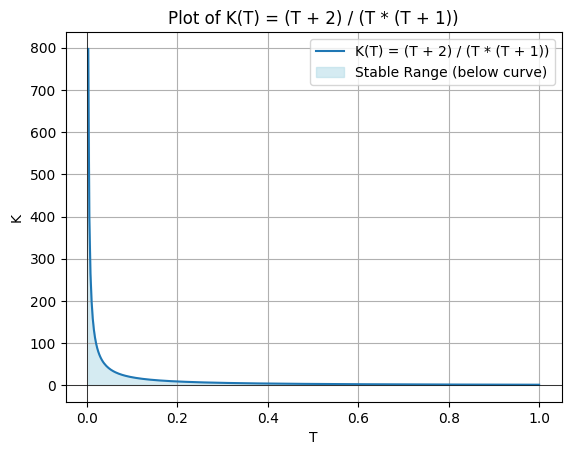

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of T, avoiding T = 0 and T = -1 to prevent division by zero
T = np.linspace(0, 1, 400)
T = T[np.logical_and(T != 0, T != -1)]

# Calculate K as a function of T
K = (T + 2) / (T * (T + 1))

# Plotting
plt.plot(T, K, label='K(T) = (T + 2) / (T * (T + 1))')
plt.fill_between(T, 1, K, color='lightblue', alpha=0.5, label='Stable Range (below curve)')

plt.xlabel('T')
plt.ylabel('K')
plt.title('Plot of K(T) = (T + 2) / (T * (T + 1))')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.legend()
plt.show()


**Note on Delay and Stability**:
- This example illustrates how increased delay ($\tau_D$) reduces the stability margin, highlighting the destabilizing effect of delay in control systems. 
- The system will be stable for a lower value of $K$.
- Dead time causes instability in the system, and should be reduced as much as possible.
- Any pair $(K, T)$ must lie in the stable range.

